In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, optimizers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.utils import image_dataset_from_directory

In [2]:
# import tensorflow as tf

print(tf.test.is_gpu_available()) 
print( tf.test.is_built_with_cuda())


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
True


In [3]:
from math import floor
import os

# Path to the directory containing the folders
directory = r"C:\Users\RAVIKANT TIWARI\Desktop\all_images"

# Get a list of all folder names
folder_names = os.listdir(directory)

# Filter out only the folders that start with "Person_"
folder_names = [folder_name for folder_name in folder_names if folder_name.startswith("Person_")]

# Sort the folder names based on the numeric part
folder_names.sort(key=lambda x: int(x.split("_")[1]))

# Rename folders with leading zeros
for i, folder_name in enumerate(folder_names, start=1):
    old_path = os.path.join(directory, folder_name)
    new_name = f"Person_{i:03d}"  # Pad with leading zeros
    new_path = os.path.join(directory, new_name)
    os.rename(old_path, new_path)

# Now use keras.utils.image_dataset_from_directory()
image_ds = keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)

print(type(image_ds))
print(image_ds.class_names)
train_size=floor(len(image_ds)*.8)
val_size=floor(len(image_ds)*.1)
test_size=floor(len(image_ds)*.1)
print(len(image_ds))
train_ds=image_ds.take(train_size)
val_ds=image_ds.skip(train_size).take(val_size)
test_ds=image_ds.skip(train_size+val_size).take(test_size)

Found 13478 files belonging to 163 classes.
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
['Person_001', 'Person_002', 'Person_003', 'Person_004', 'Person_005', 'Person_006', 'Person_007', 'Person_008', 'Person_009', 'Person_010', 'Person_011', 'Person_012', 'Person_013', 'Person_014', 'Person_015', 'Person_016', 'Person_017', 'Person_018', 'Person_019', 'Person_020', 'Person_021', 'Person_022', 'Person_023', 'Person_024', 'Person_025', 'Person_026', 'Person_027', 'Person_028', 'Person_029', 'Person_030', 'Person_031', 'Person_032', 'Person_033', 'Person_034', 'Person_035', 'Person_036', 'Person_037', 'Person_038', 'Person_039', 'Person_040', 'Person_041', 'Person_042', 'Person_043', 'Person_044', 'Person_045', 'Person_046', 'Person_047', 'Person_048', 'Person_049', 'Person_050', 'Person_051', 'Person_052', 'Person_053', 'Person_054', 'Person_055', 'Person_056', 'Person_057', 'Person_058', 'Person_059', 'Person_060', 'Person_061', 'Person_062', 'Person_063', 'Person_064

In [4]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)
test_ds=test_ds.map(process)

In [5]:
# from torch import dropout


model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1,padding='same', activation='relu', input_shape=(256, 256, 3)))    
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(163, activation='softmax'))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [7]:
model.compile(loss = 'sparse_categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

In [8]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   )
history = model.fit(train_ds,epochs=10,validation_data=val_ds,verbose=1,callbacks=es,)

Epoch 1/10
337/337 [==============================] - 89s 224ms/step - loss: 4.1961 - accuracy: 0.1195 - val_loss: 2.2614 - val_accuracy: 0.4003
Epoch 2/10
337/337 [==============================] - 109s 315ms/step - loss: 1.2421 - accuracy: 0.6550 - val_loss: 0.9673 - val_accuracy: 0.7344
Epoch 3/10
337/337 [==============================] - 91s 268ms/step - loss: 0.4126 - accuracy: 0.8744 - val_loss: 0.7794 - val_accuracy: 0.7969
Epoch 4/10
337/337 [==============================] - 111s 324ms/step - loss: 0.1815 - accuracy: 0.9417 - val_loss: 0.7595 - val_accuracy: 0.8251
Epoch 5/10
337/337 [==============================] - 98s 291ms/step - loss: 0.1100 - accuracy: 0.9663 - val_loss: 0.6165 - val_accuracy: 0.8415
Epoch 6/10
337/337 [==============================] - 81s 236ms/step - loss: 0.0976 - accuracy: 0.9683 - val_loss: 0.7916 - val_accuracy: 0.8296
Epoch 7/10
337/337 [==============================] - 86s 250ms/step - loss: 0.0905 - accuracy: 0.9711 - val_loss: 0.5944 - val_

In [9]:
scores = model.evaluate(test_ds,verbose=0)
print(int(scores[1]*100))

83


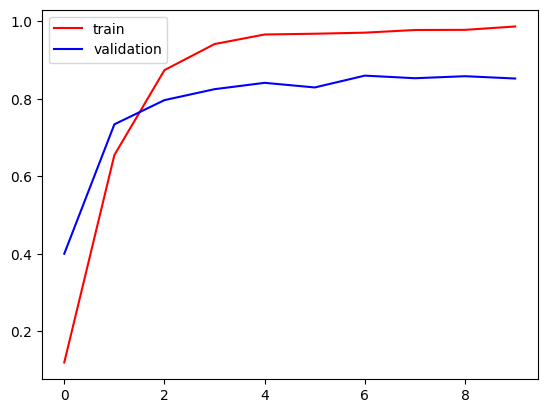

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
# plt.plot(history.history['test_accuracy'], color='green', label='test')
plt.legend()
plt.show()

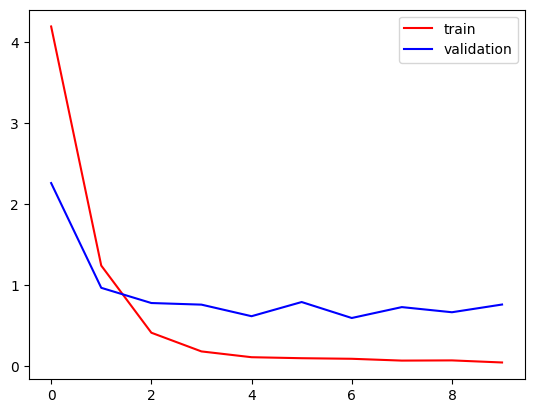

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
# save the trained model
model.save('biometric.h5')